In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import warnings
warnings.filterwarnings("ignore")




df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


It gives the top 5 rows

In [6]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


It gives the last 10 rows

In [7]:
df.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

It gives all the columns names

In [8]:
df.columns.size

12

Column size is 12

In [9]:
df.index

RangeIndex(start=0, stop=158, step=1)

In [10]:
df.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

It provides all the information

In [11]:
df.shape

(158, 12)

No. of rows are 158
and 
no.of columns are 12

In [12]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Data type of HappinessScore,Standard Error, Economy Family Health,Freedom,Trust,Generosity,Dystopia Residual  columns are float64,but Country and Regin is of object data type and Happiness Rank is of integer datatype 

In [13]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Checking the null value: There is no null value present

In [14]:
df['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

Unique keys are mentioned.

In [15]:
df['Country'].value_counts()

Togo           1
Uganda         1
Philippines    1
Vietnam        1
Mozambique     1
              ..
Paraguay       1
Indonesia      1
Algeria        1
Bangladesh     1
Honduras       1
Name: Country, Length: 158, dtype: int64

These are the value counts

In [16]:
df = df.drop(['Country', 'Region', 'Happiness Rank'], axis=1) # Creating after removing useless columns

We are dropping useless columns to avoid noise

In [17]:
df.keys()

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

These are the keys present

In [18]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It describes the statistical summary

In [19]:
#cleaning the data


In [20]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No null values are present

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

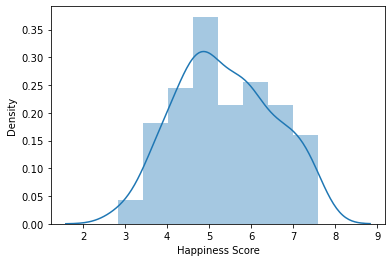

In [21]:
sns.distplot(df["Happiness Score"])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

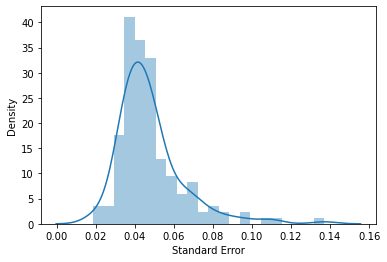

In [22]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

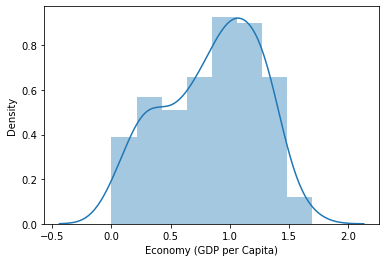

In [23]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

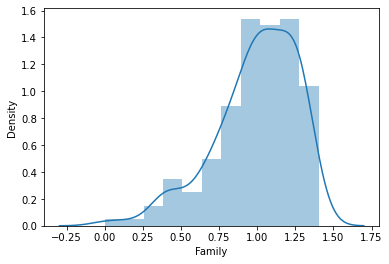

In [24]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

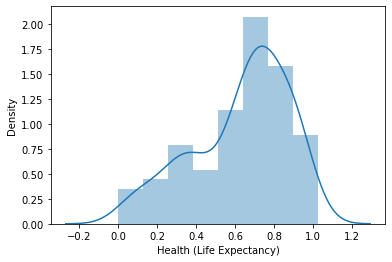

In [25]:
sns.distplot(df['Health (Life Expectancy)'])

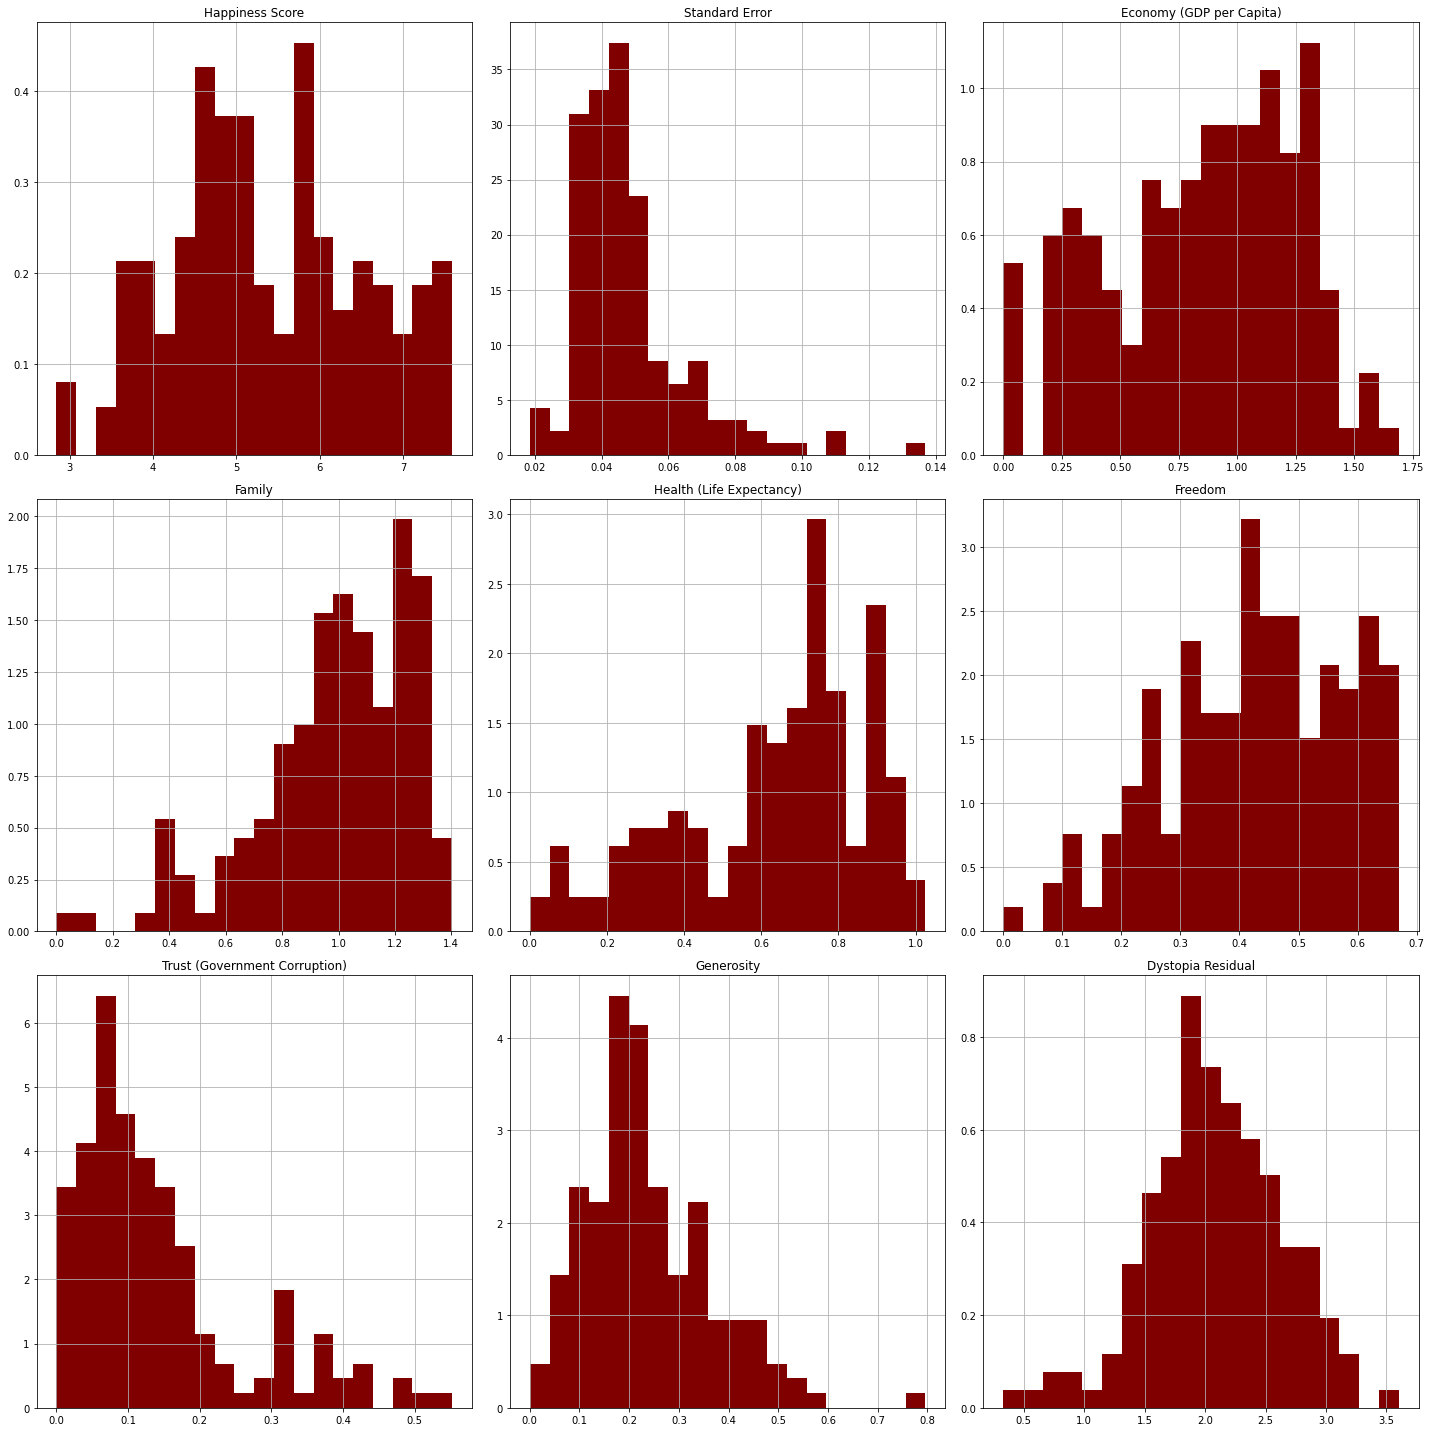

In [26]:
plt.rcParams['figure.figsize'] = (20,20)
df.hist(bins=20, color='maroon', density=True, label='Value', histtype='bar')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Comparison between Happiness Score and Economy(GDP per Capita)'}, xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

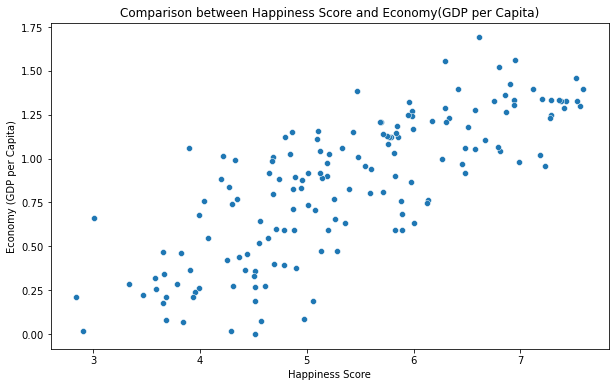

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Happiness Score and Economy(GDP per Capita)')
sns.scatterplot(df['Happiness Score'],df['Economy (GDP per Capita)'])

 Comparison between Happiness Score and Economy(GDP per Capita)

<AxesSubplot:title={'center':'Comparison between Happiness Score and Family'}, xlabel='Happiness Score', ylabel='Family'>

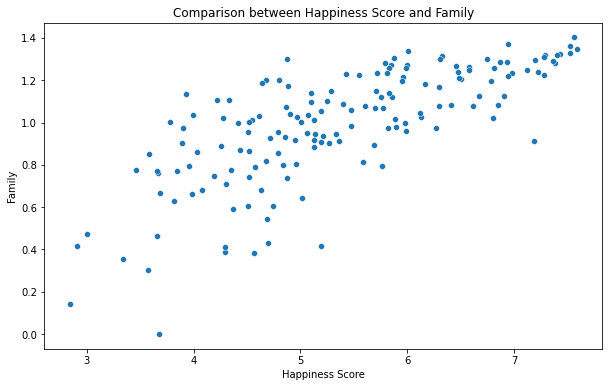

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Happiness Score and Family')
sns.scatterplot(df['Happiness Score'],df['Family'])

Comparison between Happiness Score and Family

<AxesSubplot:title={'center':'Comparison between Happiness Score and Freedom'}, xlabel='Happiness Score', ylabel='Freedom'>

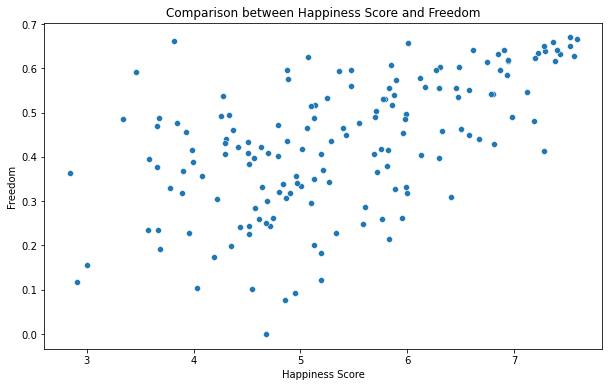

In [29]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Happiness Score and Freedom')
sns.scatterplot(df['Happiness Score'],df['Freedom'])

In [30]:
cor=df.corr()
cor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

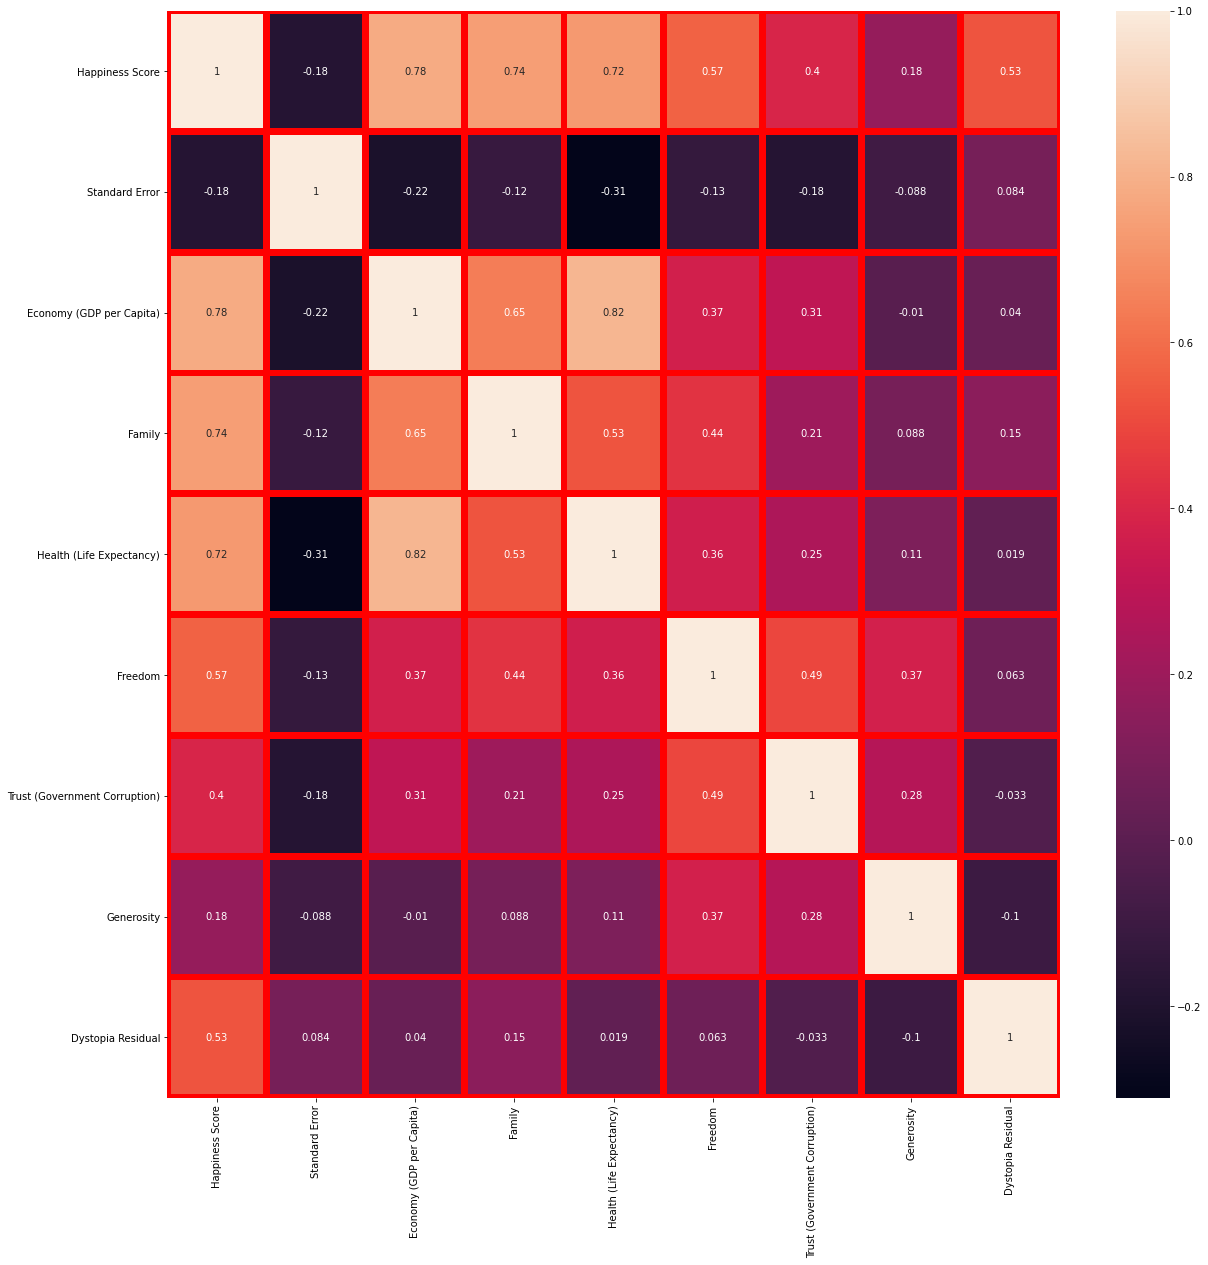

In [31]:
sns.heatmap(cor,annot=True,linewidths=6,linecolor='r')

In [32]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
# Z score method
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df1=df[(z<3).all(axis=1)]
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Applying zscore

In [34]:
df1.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

It gives the skewness

In [35]:

X = df1.drop('Happiness Score', axis=1) # List of all features
Y = df1['Happiness Score'] # Data of our label

In [36]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [37]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [38]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [39]:

X_scaled

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [41]:

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.75, random_state=42, shuffle=True)

In [42]:

# Model Selection

linear_model = LinearRegression()
svr_model = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtr_model = DecisionTreeRegressor(criterion="poisson", random_state=111)
rfr_model = RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

In [43]:
# Training the models

linear_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)
dtr_model.fit(X_train, Y_train)
rfr_model.fit(X_train, Y_train)
knr_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [44]:

# Predictions

pred_linear = linear_model.predict(X_test)
pred_svr = svr_model.predict(X_test)
pred_dtr = dtr_model.predict(X_test)
pred_rfr = rfr_model.predict(X_test)
pred_knr = knr_model.predict(X_test)

# Evaluation metrics

In [45]:

# RMSE - a lower RMSE is better than a higher one

mse_linear = mean_squared_error(Y_test, pred_linear)
mse_svr = mean_squared_error(Y_test, pred_svr)
mse_dtr = mean_squared_error(Y_test, pred_dtr)
mse_rfr = mean_squared_error(Y_test, pred_rfr)
mse_knr = mean_squared_error(Y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)
rmse_dtr = sqrt(mse_dtr)
rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.06638458610380135
RMSE of Support Vector Regression is:  0.43020959342150195
RMSE of Decision Tree Regressor is:  0.6827919656974976
RMSE of Random Forest Regressor is:  0.5686984620425248
RMSE of K Neighbors Regressor is:  0.34579756208997253


In [46]:
# R2 Score for the models

print(f"R2 Score for Linear Regression is: ", r2_score(Y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(Y_test, pred_svr, multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor is: ", r2_score(Y_test, pred_dtr, multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor is: ", r2_score(Y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(Y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  99.61289492395045
R2 Score for Support Vector Regression is:  83.74247075798078
R2 Score for Decision Tree Regressor is:  59.04837243238613
R2 Score for Random Forest Regressor is:  71.59083494280738
R2 Score for K Neighbors Regressor is:  89.49639897867345


# Hyper parameter tuning on the best ML Model

In [47]:

# Linear Regression

lt_param = {'fit_intercept' : [True,False], 'normalize' : [True,False], 
            'copy_X' : [True,False], 'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False]}

In [48]:

RSCV = RandomizedSearchCV(LinearRegression(), lt_param, cv=5)

In [49]:

RSCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [50]:

RSCV.best_params_

{'positive': True,
 'normalize': False,
 'n_jobs': 9,
 'fit_intercept': True,
 'copy_X': True}

In [51]:

Final_Model = LinearRegression(positive=True, normalize=True, n_jobs=4, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(X_train, Y_train)
lr_pred = Final_Model.predict(X_test)
lr_r2_score = r2_score(Y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 99.61289492395045


In [52]:

filename = 'FinalModel_2.pkl'
pickle.dump(Final_Model, open(filename, 'wb'))

In [53]:

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)*100
print(result)

99.61289492395045
